<a href="https://colab.research.google.com/github/huynhspm/Machine_Learning/blob/main/Multi%20Layer%20Perceptron/Multi_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

np.random.seed(2)

In [2]:
# function to plot data points
def visualize_data(X, y):
    X0 = X[y == 0, :]
    X1 = X[y == 1, :]
    X2 = X[y == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 7)
    plt.plot(X1[:, 0], X1[:, 1], 'g^', markersize = 7)
    plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 7)

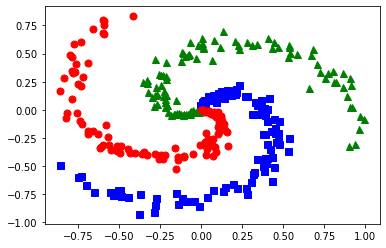

In [3]:
N = 100 # number of training sample
number_labels = 3 # number of classes 
input_layer_size = 2
X = np.zeros((N * number_labels, input_layer_size))
y = np.zeros(N * number_labels, dtype='uint8')

# create data with non-linear boundary
for j in range(number_labels):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix, :] = np.c_[r*np.sin(t), r*np.cos(t)]  # data point in class j  
    y[ix] = j   # label

visualize_data(X, y)    # plot data

In [4]:
class NeuralNetwork:
    # initialization function
    def __init__(self, X: np, y: np, input_layer_size: int, hidden_layer_size: int, number_labels: int):
        self.X = X
        self.y = y
        self.input_layer_size = input_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.number_labels = number_labels
        self.params = 0
        self.error = []

    # initial value of parameter 
    def initial_theta(self, n: int, m: int):
        return np.random.rand(n, m)

    # # Add a column-bias (full 1) to X
    def extended_data(self, X: np):
        # number of data point
        m = X.shape[0]
        one = np.ones((m, 1))
        return np.concatenate((one, X), axis = 1)

    # sigmoid function
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    # calculate gradient of sigmoid function
    def sigmoidGradient(self, z):
        g = self.sigmoid(z)
        return g * (1 - g)

    # convert labels to one hot coding
    def convert_labels(self):
        return coo_matrix((np.ones_like(self.y), (self.y, np.arange(len(self.y)))), shape = (self.number_labels, len(self.y))).toarray()

    def convertParams2Theta(self, params):
        Theta1 = params[:,:self.hidden_layer_size * (self.input_layer_size + 1)].reshape(self.hidden_layer_size, self.input_layer_size + 1)
        Theta2 = params[:,self.hidden_layer_size * (self.input_layer_size + 1):].reshape(self.number_labels, self.hidden_layer_size + 1)
        return [Theta1, Theta2]

    def convertTheta2params(self, Theta1, Theta2):
        Theta1 = Theta1.reshape(1, Theta1.shape[0] * Theta1.shape[1])
        Theta2 = Theta2.reshape(1, Theta2.shape[0] * Theta2.shape[1])
        params = np.concatenate((Theta1, Theta2), axis=1)
        return params

    # feedforward and backpropagation
    def costFunction_grad(self, params):
        [Theta1, Theta2] = self.convertParams2Theta(params)
        m = self.X.shape[0]

        X = self.extended_data(self.X)
        Y = self.convert_labels().T

        # feedforward
        Z1 = X@Theta1.T
        A1 = self.sigmoid(Z1)
        A1 = self.extended_data(A1)
        Z2 = A1@Theta2.T
        A2 = self.sigmoid(Z2)

        # loss function
        J = np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
        J = -J/m
        
        # back propagation
        delta2 = A2 - Y
        Theta2_grad = delta2.T@A1
        delta1 = (delta2@Theta2) * (A1 * (1 - A1))
        delta1 = delta1[:, 1:]
        Theta1_grad = delta1.T@X
        
        grad = self.convertTheta2params(Theta1_grad, Theta2_grad)
        grad /= m 

        return [J, grad]
    
    # function to train model 
    def train_model(self, learning_rate, max_count = 1e4):
        Theta1 = self.initial_theta(self.hidden_layer_size, self.input_layer_size + 1)
        Theta2 = self.initial_theta(self.number_labels, self.hidden_layer_size + 1)
        params = self.convertTheta2params(Theta1, Theta2)
        
        count = 0
        while count < max_count:
            count += 1
            [J, grad] = self.costFunction_grad(params)
            params -= learning_rate * grad
            if(count % 100 == 0):
                self.error.append(J)
                if(count % 1000 == 0):
                    print("iter %d, loss: %f" %(count, J))

        self.params = params
    
    # function to predict labels for data points
    def predict(self, X):
        [Theta1, Theta2] = self.convertParams2Theta(self.params)
        X = self.extended_data(X)

        Z1 = X@Theta1.T
        A1 = self.sigmoid(Z1)
        A1 = self.extended_data(A1)
        Z2 = A1@Theta2.T
        A2 = self.sigmoid(Z2)
        
        Y_pred = np.argmax(A2, axis = 1)
        return Y_pred

In [5]:
input_layer_size = 2
hidden_layer_size = 100
number_labels = 3
# initialization model
model = NeuralNetwork(X, y, input_layer_size, hidden_layer_size, number_labels)
model.train_model(1)    # train model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log


iter 1000, loss: 0.861036
iter 2000, loss: 0.330707
iter 3000, loss: 0.208319
iter 4000, loss: 0.153333
iter 5000, loss: 0.122860
iter 6000, loss: 0.103746
iter 7000, loss: 0.091085
iter 8000, loss: 0.082127
iter 9000, loss: 0.075389
iter 10000, loss: 0.070082


In [6]:
def display_result(model, X, y):
    visualize_data(X, y)
    visualize_model(model)
    plt.xlabel('Ox')
    plt.ylabel('Oy')
    plt.show()

# function to plot boundary of three classes    
def visualize_model(model):
    x1 = np.arange(-1.5, 1.5, 0.025)
    x2 = np.arange(-1.5, 1.5, 0.025)
    x1, x2 = np.meshgrid(x1, x2)
    
    xx1 = x1.ravel().reshape(x1.size, 1)
    xx2 = x2.ravel().reshape(x2.size, 1)
    
    X = np.concatenate((xx1, xx2), axis = 1)
    y = model.predict(X)
    y = y.reshape(x1.shape)
    plt.contourf(x1, x2, y, 200, cmap='jet', alpha = .1)

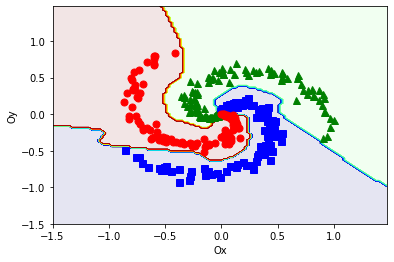

In [7]:
display_result(model, X, y) # show result

Text(0, 0.5, 'rmseLoss')

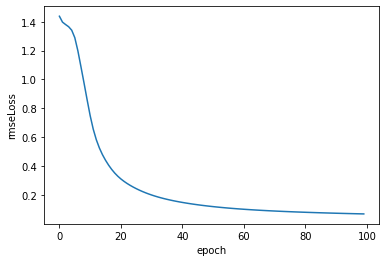

In [8]:
# plot loss function over iterators
plt.plot(model.error)
plt.xlabel('epoch')
plt.ylabel('rmseLoss')